# Data Cleaning

# Delete Redundant Columns

In [50]:
import pandas as pd

# Load the dataset
file_path = 'hr/HR-Employee-Attrition.csv'  # Update this path with your file's location
hr_data = pd.read_csv(file_path)

# Deleting redundant columns
redundant_columns = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
hr_data_cleaned = hr_data.drop(columns=redundant_columns)

# Display the columns after deletion
print("Columns after deletion:", hr_data_cleaned.columns)


Columns after deletion: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


# Renaming Columns

In [4]:
renamed_columns = {
    'DistanceFromHome': 'Distance_From_Home', 
    'TotalWorkingYears': 'Total_Working_Years',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager'
}
hr_data_cleaned.rename(columns=renamed_columns, inplace=True)
print("Renamed Columns:", hr_data_cleaned.columns)


Renamed Columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'Distance_From_Home', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'Total_Working_Years', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager'],
      dtype='object')


# Dropping Duplicates

In [5]:
hr_data_cleaned.drop_duplicates(inplace=True)
print("Data shape after dropping duplicates:", hr_data_cleaned.shape)


Data shape after dropping duplicates: (1470, 31)


# Cleaning Individual Columns

In [6]:
hr_data_cleaned['JobRole'] = hr_data_cleaned['JobRole'].str.replace('_', ' ')
print("Cleaned JobRole column:", hr_data_cleaned['JobRole'].head())


Cleaned JobRole column: 0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object


# Removing NaN Values

In [7]:
hr_data_cleaned.dropna(inplace=True)
print("Data shape after removing NaN values:", hr_data_cleaned.shape)


Data shape after removing NaN values: (1470, 31)


# Converting Categorical Variables to Numeric


In [8]:
hr_data_cleaned = pd.get_dummies(hr_data_cleaned, columns=['Department', 'Gender', 'JobRole', 'MaritalStatus'])
print("Data after one-hot encoding:\n", hr_data_cleaned.head())


Data after one-hot encoding:
    Age Attrition     BusinessTravel  DailyRate  Distance_From_Home  Education  \
0   41       Yes      Travel_Rarely       1102                   1          2   
1   49        No  Travel_Frequently        279                   8          1   
2   37       Yes      Travel_Rarely       1373                   2          2   
3   33        No  Travel_Frequently       1392                   3          4   
4   27        No      Travel_Rarely        591                   2          1   

  EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0  Life Sciences                        2          94               3  ...   
1  Life Sciences                        3          61               2  ...   
2          Other                        4          92               2  ...   
3  Life Sciences                        4          56               3  ...   
4        Medical                        1          40               3  ...   

   JobRole_Lab

# Standardizing Numeric Columns

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hr_data_cleaned[['Age', 'DailyRate', 'Distance_From_Home', 'Total_Working_Years']] = scaler.fit_transform(hr_data_cleaned[['Age', 'DailyRate', 'Distance_From_Home', 'Total_Working_Years']])
print("Data after standardization:\n", hr_data_cleaned[['Age', 'DailyRate', 'Distance_From_Home', 'Total_Working_Years']].head())


Data after standardization:
         Age  DailyRate  Distance_From_Home  Total_Working_Years
0  0.446350   0.742527           -1.010909            -0.421642
1  1.322365  -1.297775           -0.147150            -0.164511
2  0.008343   1.414363           -0.887515            -0.550208
3 -0.429664   1.461466           -0.764121            -0.421642
4 -1.086676  -0.524295           -0.887515            -0.678774


# Handling Outliers

In [10]:
Q1 = hr_data_cleaned['MonthlyIncome'].quantile(0.25)
Q3 = hr_data_cleaned['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

hr_data_cleaned = hr_data_cleaned[(hr_data_cleaned['MonthlyIncome'] >= lower_bound) & (hr_data_cleaned['MonthlyIncome'] <= upper_bound)]
print("Data after removing outliers in MonthlyIncome:\n", hr_data_cleaned.shape)


Data after removing outliers in MonthlyIncome:
 (1356, 44)


# Encoding the Target Variable (for Classification)

In [11]:
hr_data_cleaned['Attrition'] = hr_data_cleaned['Attrition'].map({'Yes': 1, 'No': 0})
print("Encoded target variable 'Attrition':\n", hr_data_cleaned['Attrition'].head())


Encoded target variable 'Attrition':
 0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


# Binning Continuous Variables

In [13]:
hr_data_cleaned['Age_bins'] = pd.cut(hr_data_cleaned['Age'], bins=[0, 25, 35, 45, 55, 65], labels=['<25', '25-35', '35-45', '45-55', '55-65'])
print("Data after binning 'Age':\n", hr_data_cleaned[['Age', 'Age_bins']].head())


Data after binning 'Age':
    Age Age_bins
0   41    35-45
1   49    45-55
2   37    35-45
3   33    25-35
4   27    25-35


#  Normalizing Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hr_data_cleaned['MonthlyIncome'] = scaler.fit_transform(hr_data_cleaned[['MonthlyIncome']])
print("Data after normalization of 'MonthlyIncome':\n", hr_data_cleaned['MonthlyIncome'].head())


Data after normalization of 'MonthlyIncome':
 0    0.262454
1    0.217009
2    0.056925
3    0.100053
4    0.129489
Name: MonthlyIncome, dtype: float64


# Extracting Information from Text Data

In [16]:
# Example: Extracting the first word from the 'JobRole' column
hr_data_cleaned['JobRole_FirstWord'] = hr_data_cleaned['JobRole'].apply(lambda x: x.split()[0])
print("Data after extracting first word from 'JobRole':\n", hr_data_cleaned['JobRole_FirstWord'].head())


Data after extracting first word from 'JobRole':
 0         Sales
1      Research
2    Laboratory
3      Research
4    Laboratory
Name: JobRole_FirstWord, dtype: object


# Dealing with Categorical Variables with Many Levels

In [18]:
# Example: Simplifying 'EducationField' by grouping less common fields into 'Other'
top_fields = hr_data_cleaned['EducationField'].value_counts().nlargest(3).index
hr_data_cleaned['EducationField_Simplified'] = hr_data_cleaned['EducationField'].apply(lambda x: x if x in top_fields else 'Other')
print("Data after simplifying 'EducationField':\n", hr_data_cleaned['EducationField_Simplified'].value_counts())


Data after simplifying 'EducationField':
 EducationField_Simplified
Life Sciences    606
Medical          464
Other            241
Marketing        159
Name: count, dtype: int64


# Data Visualization

# Correlation Map for All Numeric Variables

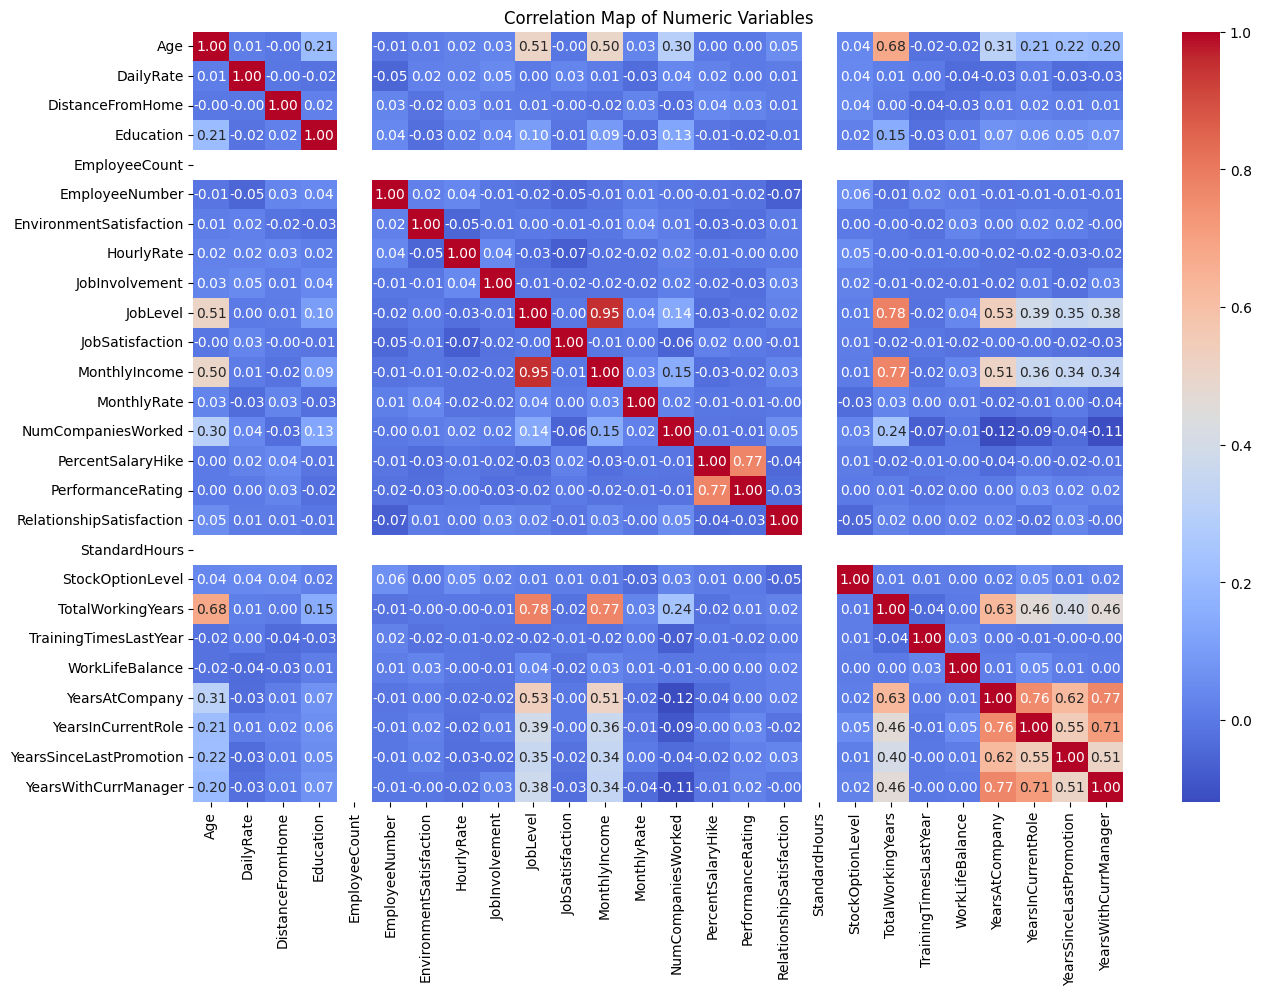

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming hr_data is your DataFrame
# Select only numeric columns for correlation
hr_data_cleaned = hr_data.select_dtypes(include=['int64', 'float64'])

# Creating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(hr_data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Map of Numeric Variables")
plt.show()



#  Overtime

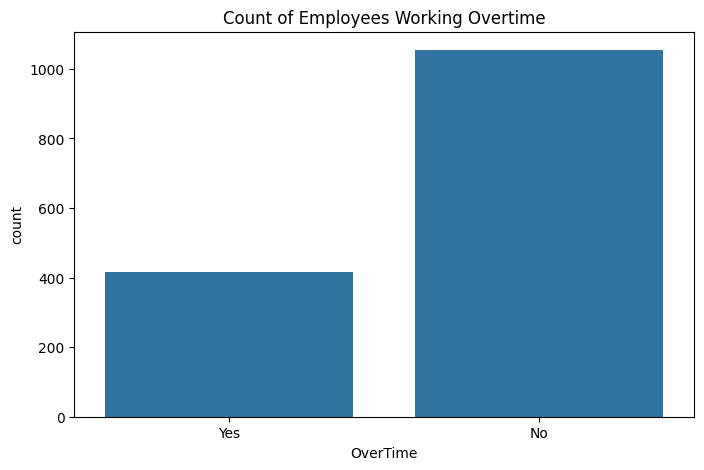

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming hr_data is your DataFrame
# Plotting the count of employees working overtime
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', data=hr_data)
plt.title("Count of Employees Working Overtime")
plt.show()



# Marital Status

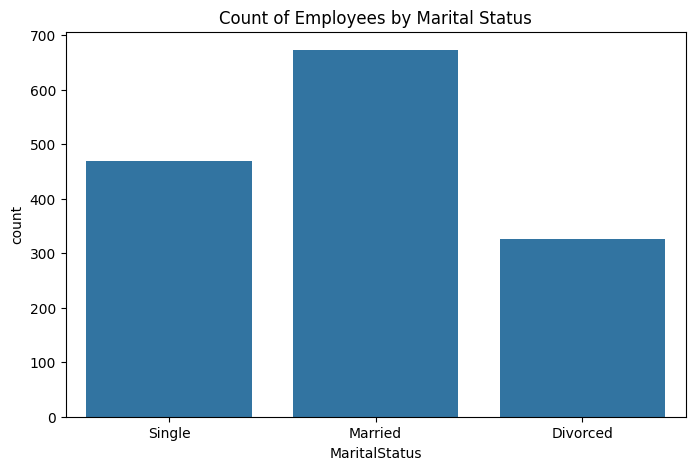

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming hr_data is your DataFrame
# Plotting the count of employees by marital status
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalStatus', data=hr_data)
plt.title("Count of Employees by Marital Status")
plt.show()


# Job Role

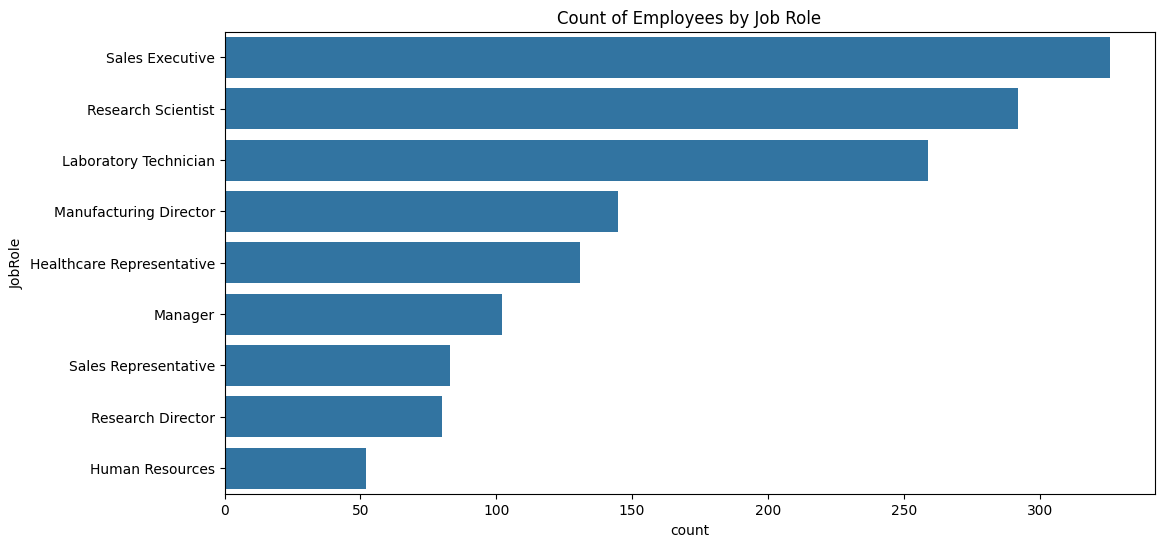

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming hr_data is your DataFrame
# Plotting the count of employees by job role
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', data=hr_data, order=hr_data['JobRole'].value_counts().index)
plt.title("Count of Employees by Job Role")
plt.show()


# Gender

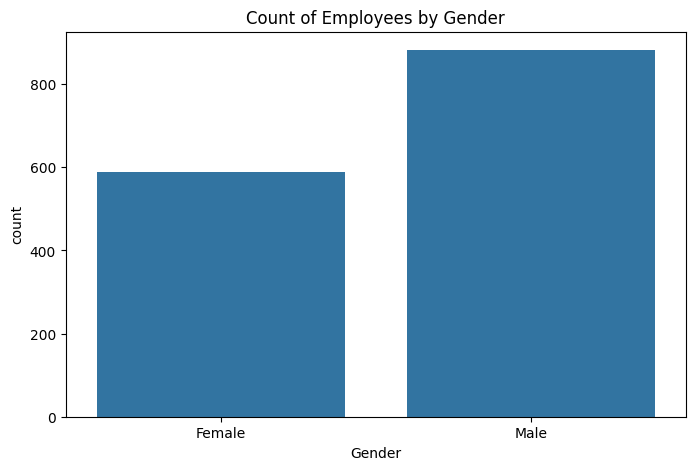

In [12]:
import pandas as pd

# Replace 'path_to_your_data.csv' with the actual path to your CSV file
# Example: 'hr_data.csv'
file_path = 'hr/HR-Employee-Attrition.csv'
hr_data_cleaned = pd.read_csv(file_path)

# Now you can create the plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=hr_data_cleaned)
plt.title("Count of Employees by Gender")
plt.show()



# Education Field

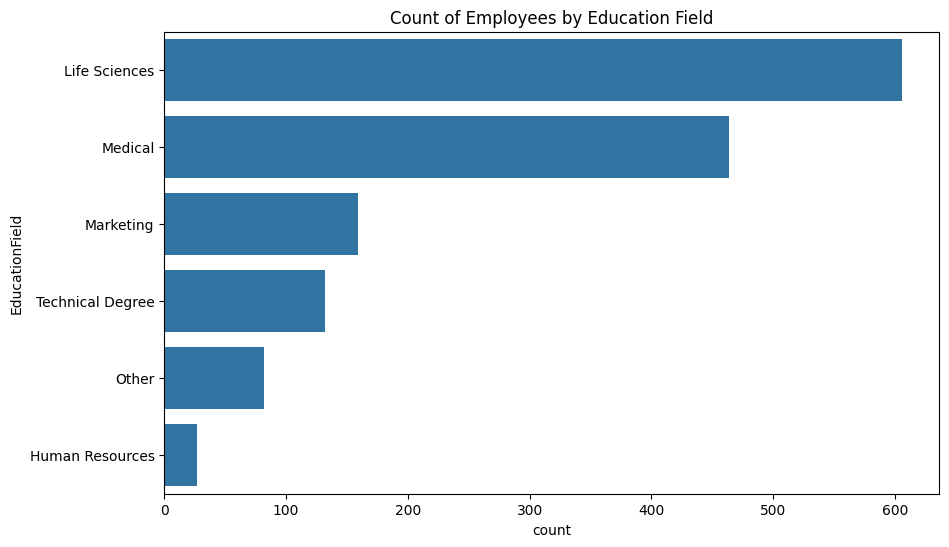

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='EducationField', data=hr_data_cleaned, order=hr_data_cleaned['EducationField'].value_counts().index)
plt.title("Count of Employees by Education Field")
plt.show()


# Department

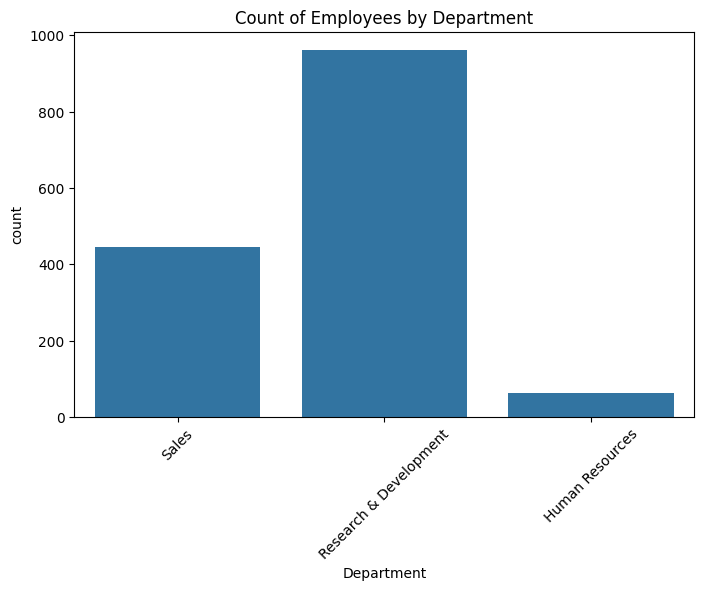

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', data=hr_data_cleaned)
plt.title("Count of Employees by Department")
plt.xticks(rotation=45)
plt.show()


# Business Travel

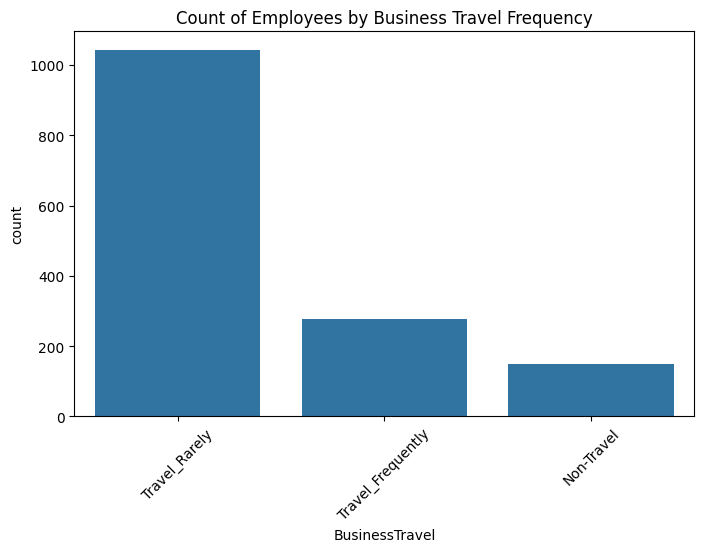

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='BusinessTravel', data=hr_data_cleaned)
plt.title("Count of Employees by Business Travel Frequency")
plt.xticks(rotation=45)
plt.show()


# Relation between Overtime and Age

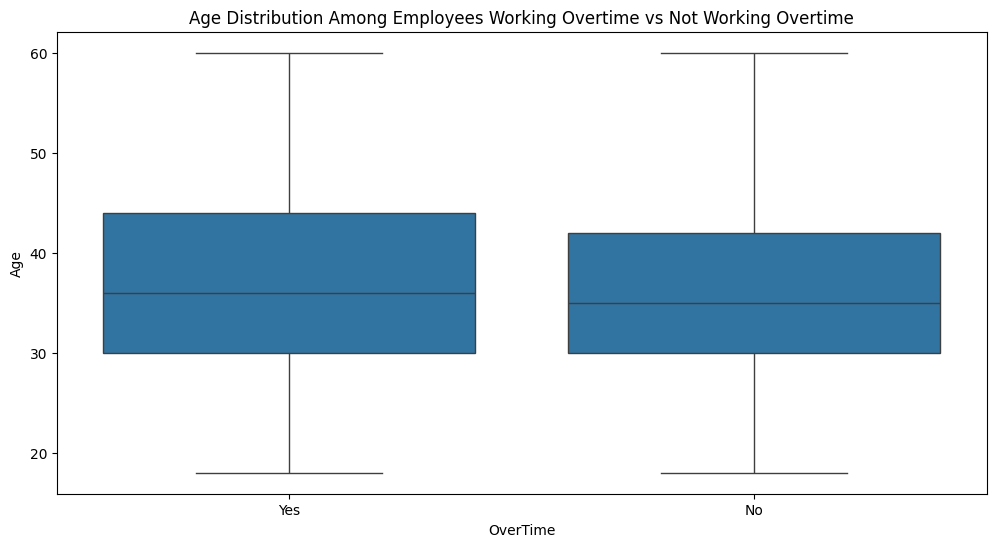

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverTime', y='Age', data=hr_data_cleaned)
plt.title("Age Distribution Among Employees Working Overtime vs Not Working Overtime")
plt.show()


# Total Working Years

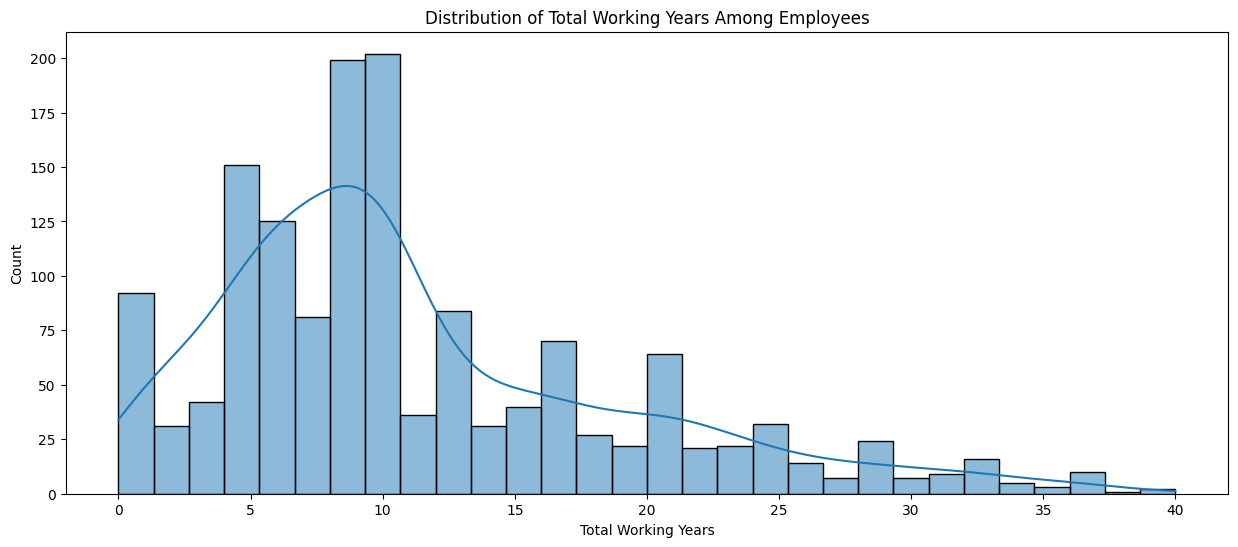

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.histplot(hr_data_cleaned['TotalWorkingYears'], bins=30, kde=True)  # Updated column name
plt.title("Distribution of Total Working Years Among Employees")
plt.xlabel("Total Working Years")
plt.show()




# Education Level

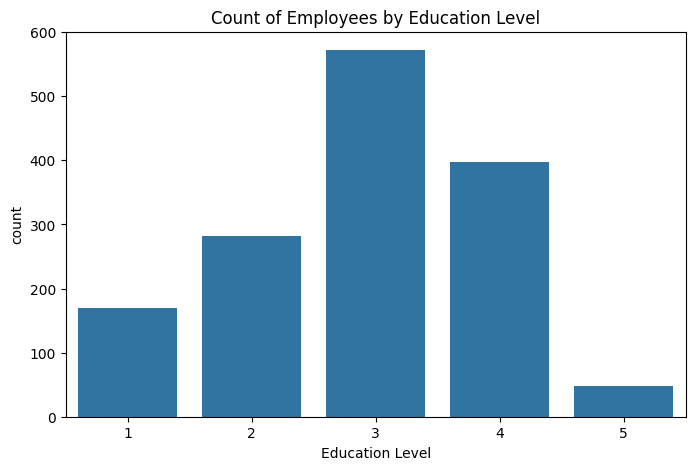

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=hr_data_cleaned)
plt.title("Count of Employees by Education Level")
plt.xlabel("Education Level")
plt.show()


# Number of Companies Worked

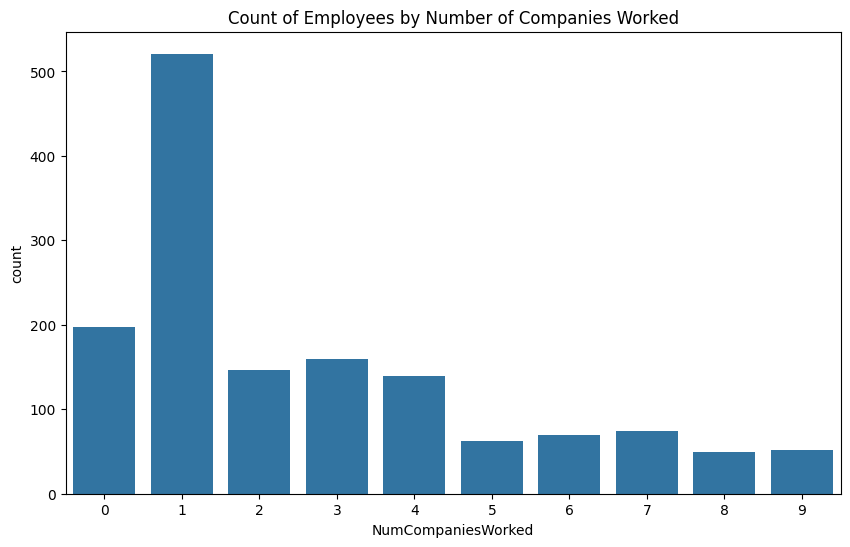

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCompaniesWorked', data=hr_data_cleaned)
plt.title("Count of Employees by Number of Companies Worked")
plt.show()


# Distance from Home

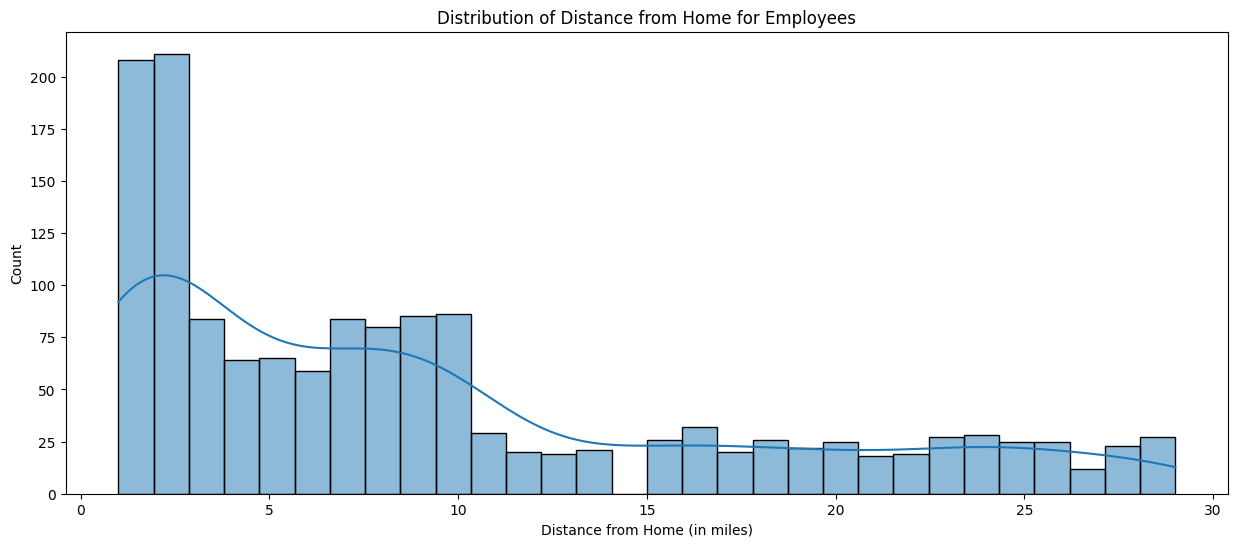

In [24]:
plt.figure(figsize=(15, 6))
sns.histplot(hr_data_cleaned['DistanceFromHome'], bins=30, kde=True)
plt.title("Distribution of Distance from Home for Employees")
plt.xlabel("Distance from Home (in miles)")
plt.show()


# Average Age by Department

In [25]:
avg_age_by_dept = hr_data_cleaned.groupby('Department')['Age'].mean()
print("Average Age by Department:\n", avg_age_by_dept)


Average Age by Department:
 Department
Human Resources           37.809524
Research & Development    37.042664
Sales                     36.542601
Name: Age, dtype: float64


# Job Role vs Monthly Income

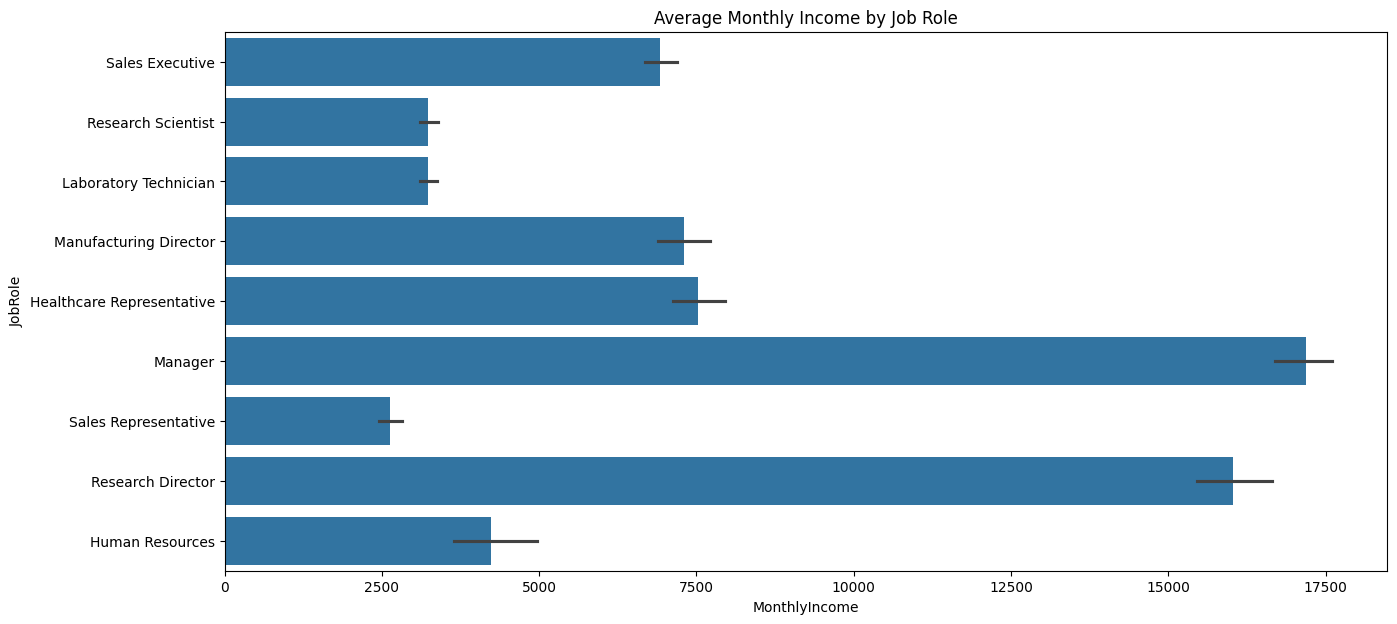

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming hr_data_cleaned is your DataFrame
plt.figure(figsize=(15, 7))
sns.barplot(x='MonthlyIncome', y='JobRole', data=hr_data_cleaned, estimator=np.mean)
plt.title("Average Monthly Income by Job Role")
plt.show()


#  Employee Attrition Rate

In [28]:
attrition_rate = hr_data_cleaned['Attrition'].value_counts(normalize=True) * 100
print("Employee Attrition Rate:\n", attrition_rate)


Employee Attrition Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


# Performance Rating Distribution

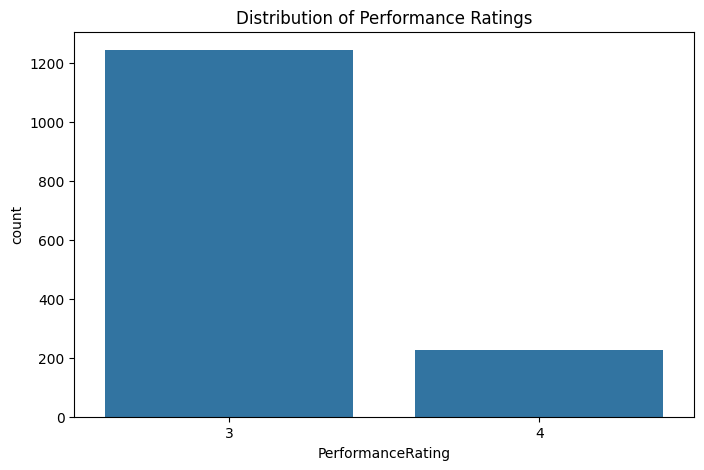

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PerformanceRating', data=hr_data_cleaned)
plt.title("Distribution of Performance Ratings")
plt.show()


# Relationship between Years at Company and Job Satisfaction

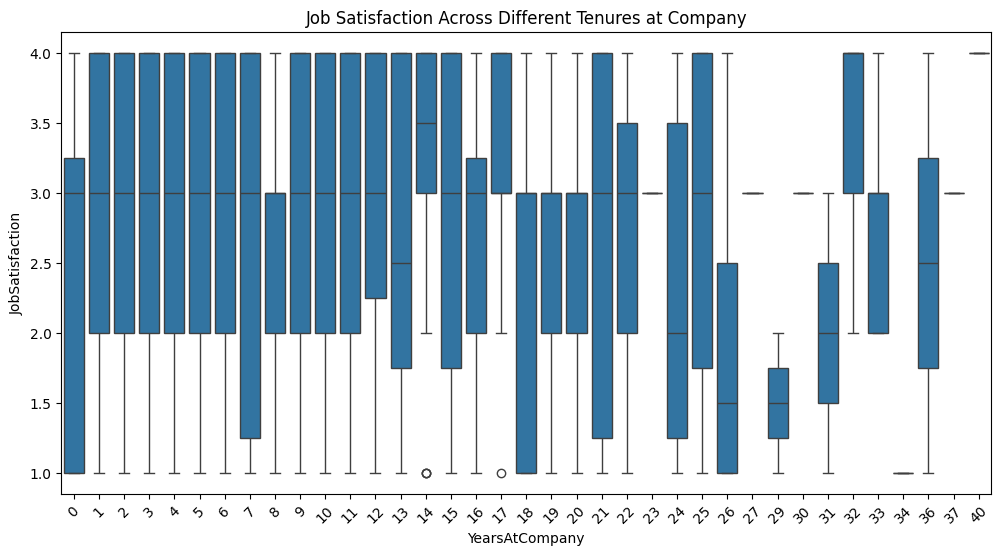

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path =  'hr/HR-Employee-Attrition.csv'  # Update with your file path
hr_data_cleaned = pd.read_csv(file_path)

# Ensure the columns 'YearsAtCompany' and 'JobSatisfaction' exist
if 'YearsAtCompany' in hr_data_cleaned.columns and 'JobSatisfaction' in hr_data_cleaned.columns:
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='YearsAtCompany', y='JobSatisfaction', data=hr_data_cleaned)
    plt.title("Job Satisfaction Across Different Tenures at Company")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("One or both columns 'YearsAtCompany' and 'JobSatisfaction' are not in the dataset.")
    print("Available columns are:", hr_data_cleaned.columns.tolist())


#  Frequency of Business Travel by Gender

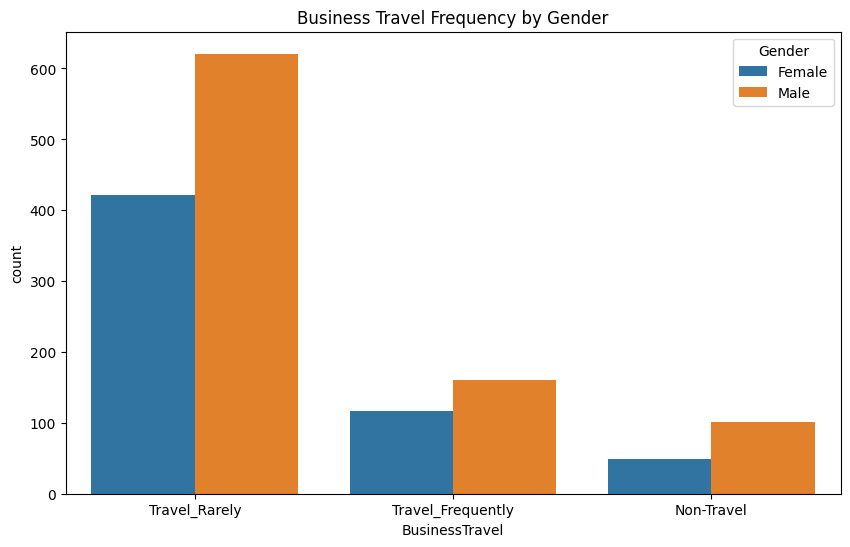

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Gender', data=hr_data_cleaned)
plt.title("Business Travel Frequency by Gender")
plt.show()


# Education Field vs Attrition

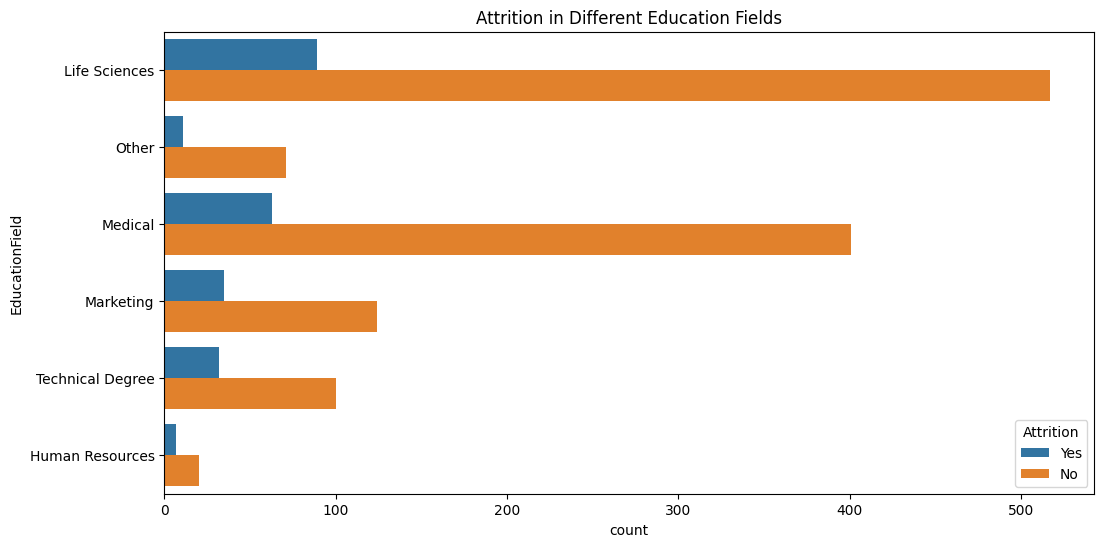

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(y='EducationField', hue='Attrition', data=hr_data_cleaned)
plt.title("Attrition in Different Education Fields")
plt.show()


# Gender Distribution in Departments

In [35]:
gender_dist_dept = hr_data_cleaned.groupby('Department')['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution in Departments:\n", gender_dist_dept)


Gender Distribution in Departments:
 Department              Gender
Human Resources         Male      68.253968
                        Female    31.746032
Research & Development  Male      60.561915
                        Female    39.438085
Sales                   Male      57.623318
                        Female    42.376682
Name: proportion, dtype: float64


# Average Daily Rate by Job Role

In [36]:
avg_daily_rate_job_role = hr_data_cleaned.groupby('JobRole')['DailyRate'].mean()
print("Average Daily Rate by Job Role:\n", avg_daily_rate_job_role)


Average Daily Rate by Job Role:
 JobRole
Healthcare Representative    854.251908
Human Resources              757.923077
Laboratory Technician        796.617761
Manager                      782.950980
Manufacturing Director       796.020690
Research Director            802.450000
Research Scientist           800.359589
Sales Executive              802.098160
Sales Representative         811.349398
Name: DailyRate, dtype: float64


# Count of Employees by Education Level and Field

In [37]:
education_level_field = hr_data_cleaned.groupby(['Education', 'EducationField']).size()
print("Count of Employees by Education Level and Field:\n", education_level_field)


Count of Employees by Education Level and Field:
 Education  EducationField  
1          Human Resources       2
           Life Sciences        67
           Marketing            14
           Medical              63
           Other                 5
           Technical Degree     19
2          Human Resources       2
           Life Sciences       116
           Marketing            24
           Medical              99
           Other                19
           Technical Degree     22
3          Human Resources      16
           Life Sciences       233
           Marketing            59
           Medical             183
           Other                24
           Technical Degree     57
4          Human Resources       5
           Life Sciences       173
           Marketing            52
           Medical             104
           Other                33
           Technical Degree     31
5          Human Resources       2
           Life Sciences        17
           M

# Job Role and Their Impact on Attrition

In [38]:
attrition_by_jobrole = hr_data_cleaned.groupby('JobRole')['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate by Job Role:\n", attrition_by_jobrole)


Attrition Rate by Job Role:
 JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative       No           60.240964
                           Yes          39.759036
Name: proportion, dtype: float64


#  Average Years With Current Manager by Department

In [42]:
avg_years_with_manager = hr_data_cleaned.groupby('Department')['YearsWithCurrManager'].mean()
print("Average Years With Current Manager by Department:\n", avg_years_with_manager)



Average Years With Current Manager by Department:
 Department
Human Resources           3.666667
Research & Development    4.084287
Sales                     4.271300
Name: YearsWithCurrManager, dtype: float64


# Distribution of Work-Life Balance Ratings

In [43]:
work_life_balance = hr_data_cleaned['WorkLifeBalance'].value_counts(normalize=True) * 100
print("Work-Life Balance Ratings Distribution:\n", work_life_balance)


Work-Life Balance Ratings Distribution:
 WorkLifeBalance
3    60.748299
2    23.401361
4    10.408163
1     5.442177
Name: proportion, dtype: float64


# Average Monthly Income by Gender and Marital Status

In [44]:
avg_income_by_gender_marital = hr_data_cleaned.groupby(['Gender', 'MaritalStatus'])['MonthlyIncome'].mean()
print("Average Monthly Income by Gender and Marital Status:\n", avg_income_by_gender_marital)


Average Monthly Income by Gender and Marital Status:
 Gender  MaritalStatus
Female  Divorced         6769.324786
        Married          7156.970588
        Single           5994.944724
Male    Divorced         6795.738095
        Married          6547.244389
        Single           5812.022140
Name: MonthlyIncome, dtype: float64


# Distance From Home Across Different Departments

In [46]:
distance_from_home_dept = hr_data_cleaned.groupby('Department')['DistanceFromHome'].mean()
print("Average Distance From Home by Department:\n", distance_from_home_dept)


Average Distance From Home by Department:
 Department
Human Resources           8.698413
Research & Development    9.144641
Sales                     9.365471
Name: DistanceFromHome, dtype: float64


# OverTime Impact on Monthly Income

In [47]:
overtime_income = hr_data_cleaned.groupby('OverTime')['MonthlyIncome'].mean()
print("Average Monthly Income Based on Overtime:\n", overtime_income)


Average Monthly Income Based on Overtime:
 OverTime
No     6484.926945
Yes    6548.548077
Name: MonthlyIncome, dtype: float64


# Relationship Between Age and Total Working Years

In [49]:
age_working_years_corr = hr_data_cleaned[['Age', 'TotalWorkingYears']].corr()
print("Correlation Between Age and Total Working Years:\n", age_working_years_corr)


Correlation Between Age and Total Working Years:
                         Age  TotalWorkingYears
Age                1.000000           0.680381
TotalWorkingYears  0.680381           1.000000
